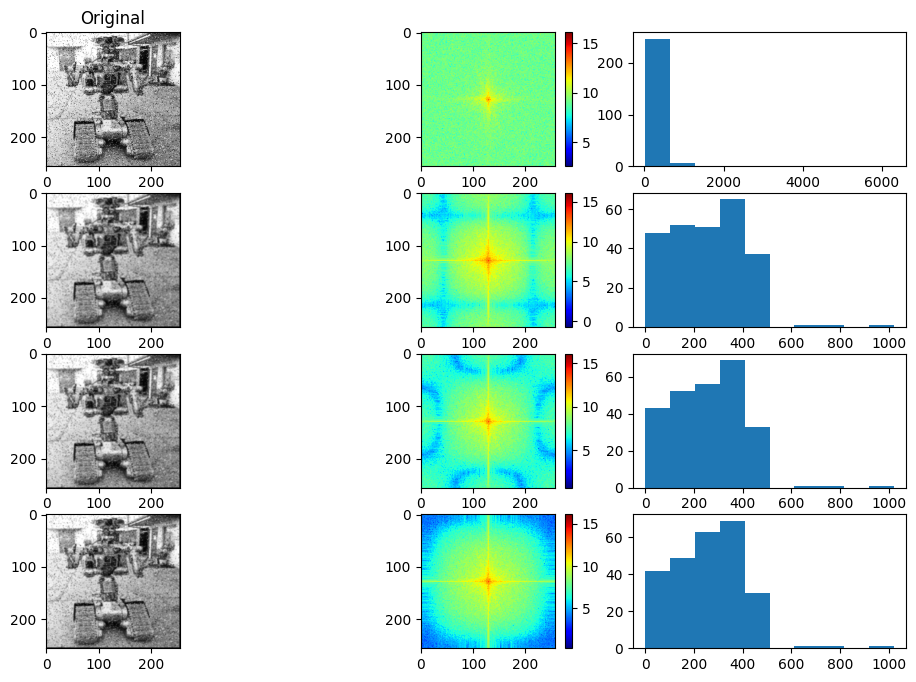

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

cv05_robotS = cv2.imread("cv05_robotS.bmp")
cv05_PSS = cv2.imread("cv05_PSS.bmp")

def D2_DFT(image):
    """
    2D Discrete Fourier Transform.
    :param image: vstupní obraz
    :return: 2D DFT obrazu
    """
    fft2= np.fft.fft2(image)
    # shift zero-frequency component to the center of the spectrum
    fft2_shift= np.fft.fftshift(fft2)
    return fft2_shift, fft2

def plot_spectrum(image):
    """
    Vykreslení spektra obrazu.
    :param fft2_shift: spektrum obrazu
    """
    fft2_shift = D2_DFT(image)[0]
    log_real = np.log(np.abs(fft2_shift))
    plt.imshow(log_real, cmap="jet")
    plt.colorbar(fraction=0.046, pad=0.04)

def plot_histogram(image):
    """
    Vykreslení histogramu obrazu.
    :param image: vstupní obraz
    """
    plt.hist(cv2.calcHist([image], [0], None, [256], [0, 256]))
    
def apply_simple_average_filter(image, h):
    """
    Metoda prostého průměrování na obrazu.

    :param image: vstupní obraz
    :param h: filtr matice 3x3
    :return: obraz s aplikovaným filtrem
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Inicializace výstupního obrazu
    filtered_image = np.zeros_like(image)    
    
    # Výpočet poloviny jádra filtru
    s = h.shape[0] // 2
    
    # Procházení všech pixelů obrazu
    for i in range(s, image.shape[0] - s):
        for j in range(s, image.shape[1] - s):
            # Výpočet nového pixelu
            filtered_image[i, j] = np.sum(image[(i - s):(i + s + 1), (j - s):(j + s + 1)]*h)
    
    return filtered_image
    
h1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
h2 = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]])/10
h3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16

plt.figure(figsize=(12, 8))
plt.subplot(4, 3, 1)
plt.title("Original")
plt.imshow(cv05_robotS, cmap="gray")
#spectrum
plt.subplot(4, 3, 2)
plot_spectrum(cv2.cvtColor(cv05_robotS, cv2.COLOR_RGB2GRAY))
#histogram
plt.subplot(4, 3, 3)
plot_histogram(cv05_robotS)

plt.subplot(4, 3, 4)
plt.title("Filtered h1")
cv05_robotS_filtered1 = apply_simple_average_filter(cv05_robotS, h1)
plt.imshow(cv05_robotS_filtered1, cmap="gray")
#spectrum
plt.subplot(4, 3, 5)
plot_spectrum(cv05_robotS_filtered1)
#histogram
plt.subplot(4, 3, 6)
plot_histogram(cv05_robotS_filtered1)

plt.subplot(4, 3, 7)
plt.title("Filtered h2")
cv05_robotS_filtered2 = apply_simple_average_filter(cv05_robotS, h2)
plt.imshow(cv05_robotS_filtered2, cmap="gray")
#spectrum
plt.subplot(4, 3, 8)
plot_spectrum(cv05_robotS_filtered2)
#histogram
plt.subplot(4, 3, 9)
plot_histogram(cv05_robotS_filtered2)

plt.subplot(4, 3, 10)
plt.title("Filtered h3")
cv05_robotS_filtered3 = apply_simple_average_filter(cv05_robotS, h3)
plt.imshow(cv05_robotS_filtered3, cmap="gray")
#spectrum
plt.subplot(4, 3, 11)
plot_spectrum(cv05_robotS_filtered3)
#histogram
plt.subplot(4, 3, 12)
plot_histogram(cv05_robotS_filtered3)


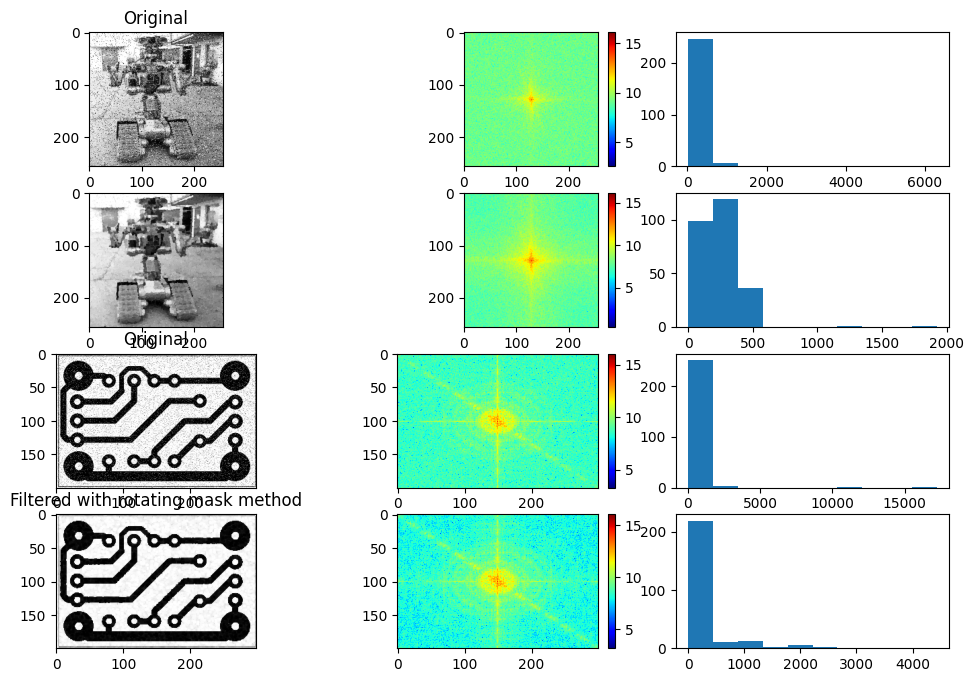

In [30]:
def rotate_mask_method(image):
    """
    Metoda rotující masky.
    
    :param image: vstupní obraz
    
    :return: obraz s aplikovaným filtrem rotující masky
    """
    h = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9

    # Prevod obrazu na stupnice sedi
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inicializace výstupního obrazu
    filtered_image = np.zeros_like(gray)

    temp_img = np.zeros((gray.shape[0]+4, gray.shape[1]+4))
    temp_img[2:-2, 2:-2] = gray

    filtered_image = np.zeros_like(gray)
    for i in range(2, temp_img.shape[0]-2):
        for j in range(2, temp_img.shape[1]-2):
            mask1 = temp_img[i-2:i+1, j-2:j+1]
            mask2 = temp_img[i-1:i+2, j-2:j+1]
            mask3 = temp_img[i:i+3, j-2:j+1]

            mask4 = temp_img[i-2:i+1, j:j+3]
            mask5 = temp_img[i-1:i+2, j:j+3]
            mask6 = temp_img[i:i+3, j:j+3]

            mask7 = temp_img[i-2:i+1, j-1:j+2]
            mask8 = temp_img[i:i+3, j-1:j+2]

            masks = [mask1, mask2, mask3, mask4, mask5, mask6, mask7, mask8]

            vars_arr = []
            for mask in masks:
                vars_arr.append(np.var(mask))

            min_var = np.argmin(vars_arr)

            filtered_image[i-2, j-2] = np.mean(masks[min_var])
    return filtered_image


plt.figure(figsize=(12, 8))

plt.subplot(4, 3, 1)
plt.title("Original")
plt.imshow(cv05_robotS, cmap="gray")
#spectrum
plt.subplot(4, 3, 2)
plot_spectrum(cv2.cvtColor(cv05_robotS, cv2.COLOR_RGB2GRAY))
#histogram
plt.subplot(4, 3, 3)
plot_histogram(cv05_robotS)

cv05_robotS_rmask = rotate_mask_method(cv05_robotS)
plt.subplot(4, 3, 4)
plt.imshow(cv05_robotS_rmask, cmap="gray")
#spectrum
plt.subplot(4, 3, 5)
plot_spectrum(cv05_robotS_rmask)
#histogram
plt.subplot(4, 3, 6)
plot_histogram(cv05_robotS_rmask)

plt.subplot(4, 3, 7)
plt.title("Original")
plt.imshow(cv05_PSS, cmap="gray")
#spectrum
plt.subplot(4, 3, 8)
plot_spectrum(cv2.cvtColor(cv05_PSS, cv2.COLOR_RGB2GRAY))
#histogram
plt.subplot(4, 3, 9)
plot_histogram(cv05_PSS)

cv05_PSS_rmask = rotate_mask_method(cv05_PSS)

plt.subplot(4, 3, 10)
plt.title("Filtered with rotating mask method")
plt.imshow(cv05_PSS_rmask, cmap="gray")
#spectrum
plt.subplot(4, 3, 11)
plot_spectrum(cv05_PSS_rmask)
#histogram
plt.subplot(4, 3, 12)
plot_histogram(cv05_PSS_rmask)

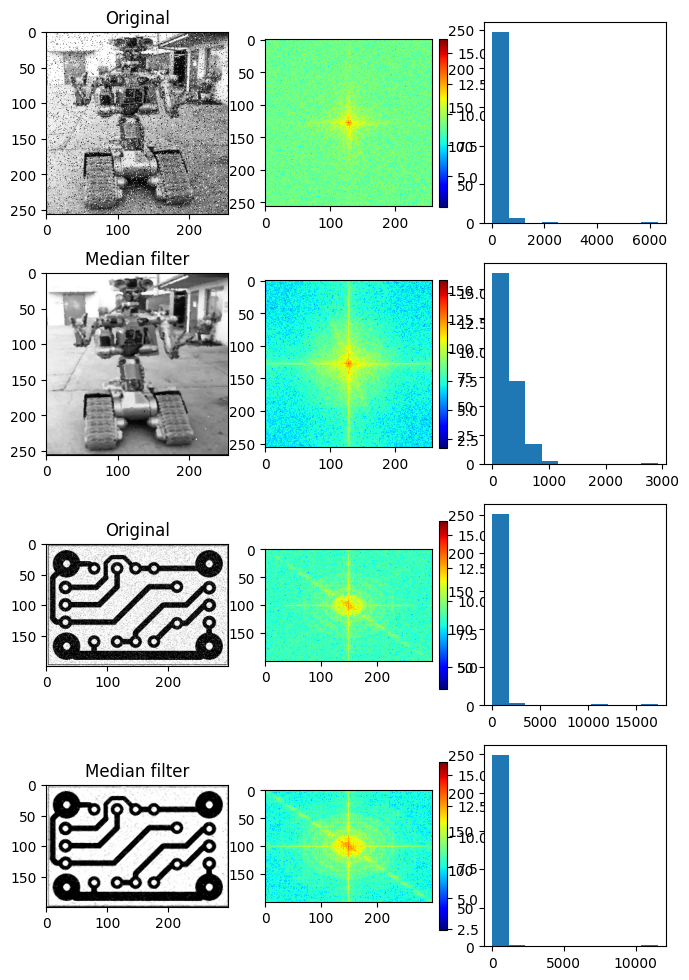

In [33]:
def simple_median_filter(image, h):
    """
    Metoda prostého průměrování na obrazu.

    :param image: vstupní obraz
    :param kernel_size: velikost jádra filtru
    :return: obraz s aplikovaným filtrem
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Inicializace výstupního obrazu
    filtered_image = np.zeros_like(image)

    # Výpočet poloviny jádra filtru
    s = h.shape[0] // 2

    # Procházení všech pixelů obrazu
    for i in range(s, image.shape[0] - s):
        for j in range(s, image.shape[1] - s):
            # Výpočet nového pixelu
            filtered_image[i, j] = np.median(
                image[(i - s):(i + s + 1), (j - s):(j + s + 1)])

    return filtered_image


plt.figure(figsize=(8, 12))
# original
plt.subplot(4, 3, 1)
plt.title("Original")
plt.imshow(cv05_robotS, cmap="gray")

#spectrum
plt.subplot(4, 3, 2)
plot_spectrum(cv2.cvtColor(cv05_robotS, cv2.COLOR_RGB2GRAY))

#histogram
plt.subplot(4, 3, 3)
plot_histogram(cv05_robotS)

plt.subplot(4, 3, 4)
plt.title("Median filter")
cv05_robotS_simple = simple_median_filter(cv05_robotS, np.ones((3, 3)))
plt.imshow(cv05_robotS_simple, cmap="gray")

# spectre
plt.subplot(4, 3, 5)
plot_spectrum(cv05_robotS_simple)

# histogram
plt.subplot(4, 3, 6)
plot_histogram(cv05_robotS_simple)


plt.subplot(4, 3, 7)
plt.title("Original")
plt.imshow(cv05_PSS, cmap="gray")
#spectrum
plt.subplot(4, 3, 8)
plot_spectrum(cv2.cvtColor(cv05_PSS, cv2.COLOR_RGB2GRAY))
#histogram
plt.subplot(4, 3, 9)
plot_histogram(cv05_PSS)

cv05_PSS_simple = simple_median_filter(cv05_PSS, np.ones((3, 3)))
plt.subplot(4, 3, 10)
plt.title("Median filter")
plt.imshow(cv05_PSS_simple, cmap="gray")
# spectre
plt.subplot(4, 3, 11)
plot_spectrum(cv05_PSS_simple)
# histogram
plt.subplot(4, 3, 12)
plot_histogram(cv05_PSS_simple)